In [62]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


<Axes: >

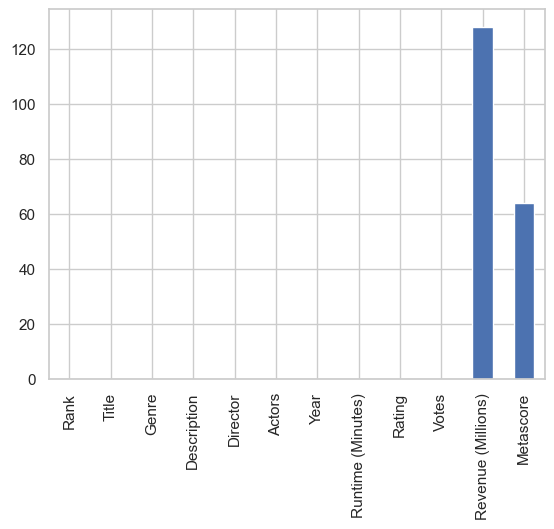

In [63]:
movies_data = pd.read_csv(r'IMDB_movie_data.csv')
print(movies_data.info())

# Checking the dataset for missing values
movies_data.isna().sum().plot(kind='bar')

In [64]:
movie_cleared = movies_data.dropna()
movie_cleared.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [65]:
# Describing the dataset
columns_to_describe = ["Metascore", "Revenue (Millions)", "Runtime (Minutes)"]
print(movie_cleared[columns_to_describe].describe())

        Metascore  Revenue (Millions)  Runtime (Minutes)
count  838.000000          838.000000         838.000000
mean    59.575179           84.564558         114.638425
std     16.952416          104.520227          18.470922
min     11.000000            0.000000          66.000000
25%     47.000000           13.967500         101.000000
50%     60.000000           48.150000         112.000000
75%     72.000000          116.800000         124.000000
max    100.000000          936.630000         187.000000


In [66]:
# Summary of dataset elements 

#Metascore groups 
movie_cleared_metascore = movie_cleared["Metascore"]
high_metascore = movie_cleared_metascore >=60
middle_metascore = (movie_cleared_metascore <60) & (movie_cleared_metascore >30)
low_metascore   =  movie_cleared_metascore <=30

#Revenue groups
movie_cleared_revenue = movie_cleared["Revenue (Millions)"]
high_revenue = movie_cleared_revenue >= movie_cleared_revenue.mean()
middle_revenue = (movie_cleared_revenue < movie_cleared_revenue.mean()) & (movie_cleared_revenue > movie_cleared_revenue.mean()/2)
low_revenue = movie_cleared_revenue <= movie_cleared_revenue.mean()/2


In [67]:
# Top 10 directors with the highest average metascore, only including directors with at least 10 movies
min_metascore_count = 3
top_directors = movie_cleared.groupby("Director")["Metascore"].agg([np.min, np.max, np.mean, "size"])
top_directors = top_directors.rename(columns={"amin": "Min Metascore", "amax": "Max Metascore", "mean": "Average Metascore", "size": "Count"})
top_directors = top_directors[top_directors["Count"] >= min_metascore_count]
top_directors = top_directors.sort_values("Average Metascore", ascending=False).head(10)
print(top_directors)

                             Min Metascore  Max Metascore  Average Metascore  \
Director                                                                       
Wes Anderson                          83.0           88.0          85.000000   
Steve McQueen                         72.0           96.0          83.333333   
Ethan Coen                            72.0           91.0          81.000000   
David Fincher                         70.0           95.0          78.600000   
Alejandro González Iñárritu           69.0           88.0          77.666667   
Edgar Wright                          69.0           81.0          77.000000   
Martin Scorsese                       63.0           85.0          77.000000   
Guillermo del Toro                    64.0           98.0          76.500000   
David O. Russell                      56.0           90.0          76.500000   
Brad Bird                             60.0           96.0          76.333333   

                             Count  
Di

In [68]:
min_metascore_count = 3

# Top 10 directors with the highest average metascore, including revenue information
top_directors = movie_cleared.groupby("Director").agg({
    "Metascore": ["size", np.min, np.max, np.mean],
    "Revenue (Millions)": [np.min, np.max, np.mean]
}).round()
top_directors.columns = ["Count", "Min Mtscore", "Max Mtscore", "Avg Mtscore", "Min Rev mln","Max Rev mln", "Avg Rev mln"]
top_directors = top_directors[top_directors["Count"] >= min_metascore_count]

# Sort by average metascore in descending order and get the top 10 directors
top_directors_rev = top_directors.sort_values(["Avg Rev mln","Avg Mtscore"],ascending=False).head(10)
top_directors_mtscore = top_directors.sort_values(["Avg Mtscore","Avg Rev mln"],ascending=False).head(10)
print(top_directors)

                             Count  Min Mtscore  Max Mtscore  Avg Mtscore  \
Director                                                                    
Adam McKay                       4         51.0         81.0         66.0   
Alejandro González Iñárritu      3         69.0         88.0         78.0   
Alexandre Aja                    3         46.0         53.0         50.0   
Antoine Fuqua                    5         41.0         57.0         52.0   
Ben Affleck                      4         49.0         86.0         70.0   
...                            ...          ...          ...          ...   
Tom Tykwer                       3         55.0         58.0         56.0   
Wes Anderson                     3         83.0         88.0         85.0   
Will Gluck                       3         33.0         72.0         56.0   
Woody Allen                      5         54.0         81.0         69.0   
Zack Snyder                      5         33.0         56.0         48.0   

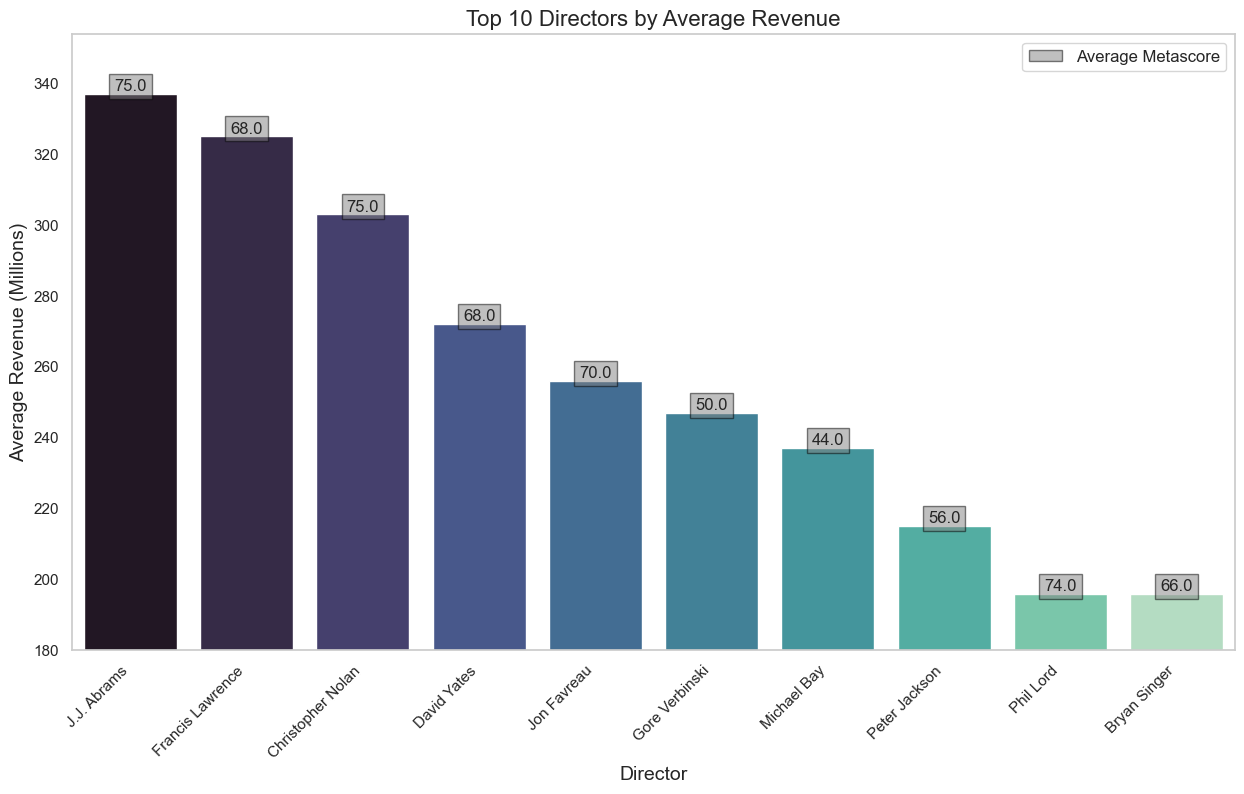

In [69]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=top_directors_rev.index,
    y=top_directors_rev["Avg Rev mln"],
    palette="mako"
)

# Adding title and labels
bar_plot.set_title("Top 10 Directors by Average Revenue", fontsize=16)
bar_plot.set_xlabel("Director", fontsize=14)
bar_plot.set_ylabel("Average Revenue (Millions)", fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding grid lines
bar_plot.yaxis.grid(False)
bar_plot.xaxis.grid(False)

# Setting y-axis limits to improve readability
bar_plot.set_ylim(180)

# Annotating the bars with average metascore
for i, (index, row) in enumerate(top_directors_rev.iterrows()):
    bar_plot.annotate(
        f'{row["Avg Mtscore"]:.1f}', 
        xy=(i, row["Avg Rev mln"]), 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="grey", alpha=0.5)
    )

# Adding a legend for the annotations
square_patch = mpatches.Patch(facecolor="grey", alpha=0.5, edgecolor='black', label='Average Metascore')
plt.legend(handles=[square_patch], loc='upper right', fontsize=12)
plt.show()


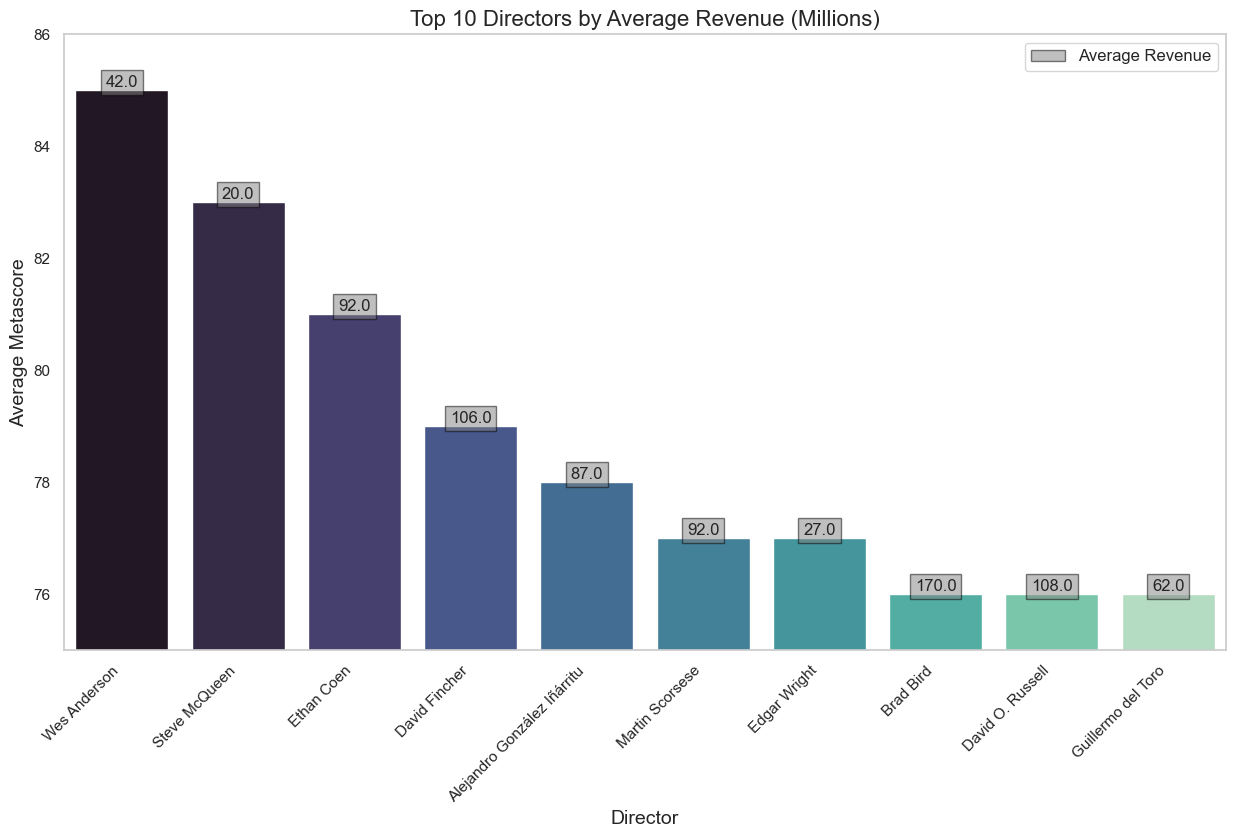

In [70]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=top_directors_mtscore.index,
    y=top_directors_mtscore["Avg Mtscore"],
    palette="mako"
)

# Adding title and labels
bar_plot.set_title("Top 10 Directors by Average Revenue (Millions)", fontsize=16)
bar_plot.set_xlabel("Director", fontsize=14)
bar_plot.set_ylabel("Average Metascore", fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding grid lines
bar_plot.yaxis.grid(False)
bar_plot.xaxis.grid(False)

# Setting y-axis limits to improve readability
bar_plot.set_ylim(75, 86)

# Annotating the bars with average metascore
for i, (index, row) in enumerate(top_directors_mtscore.iterrows()):
    bar_plot.annotate(
        f'{row["Avg Rev mln"]:.1f}', 
        xy=(i, row["Avg Mtscore"]), 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="grey", alpha=0.5)
    )

# Adding a legend for the annotations
square_patch = mpatches.Patch(facecolor="grey", alpha=0.5, edgecolor='black', label='Average Revenue')
plt.legend(handles=[square_patch], loc='upper right', fontsize=12)
plt.show()

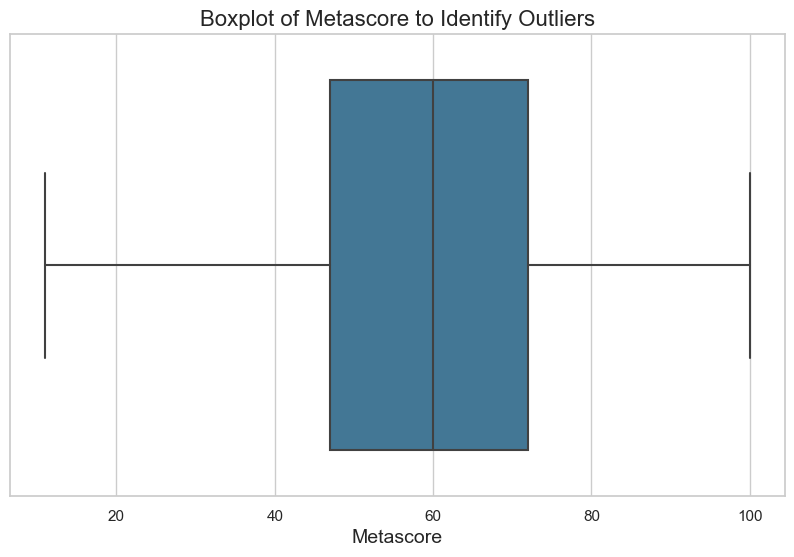

Outliers in Metascore:
Empty DataFrame
Columns: [Title, Director, Metascore]
Index: []


C:\Users\e10134199\AppData\Local\Temp\ipykernel_23788\3635593905.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  outliers_plot = sns.scatterplot(
C:\Users\e10134199\AppData\Local\Temp\ipykernel_23788\3635593905.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  outliers_plot.set_xticklabels(outliers_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


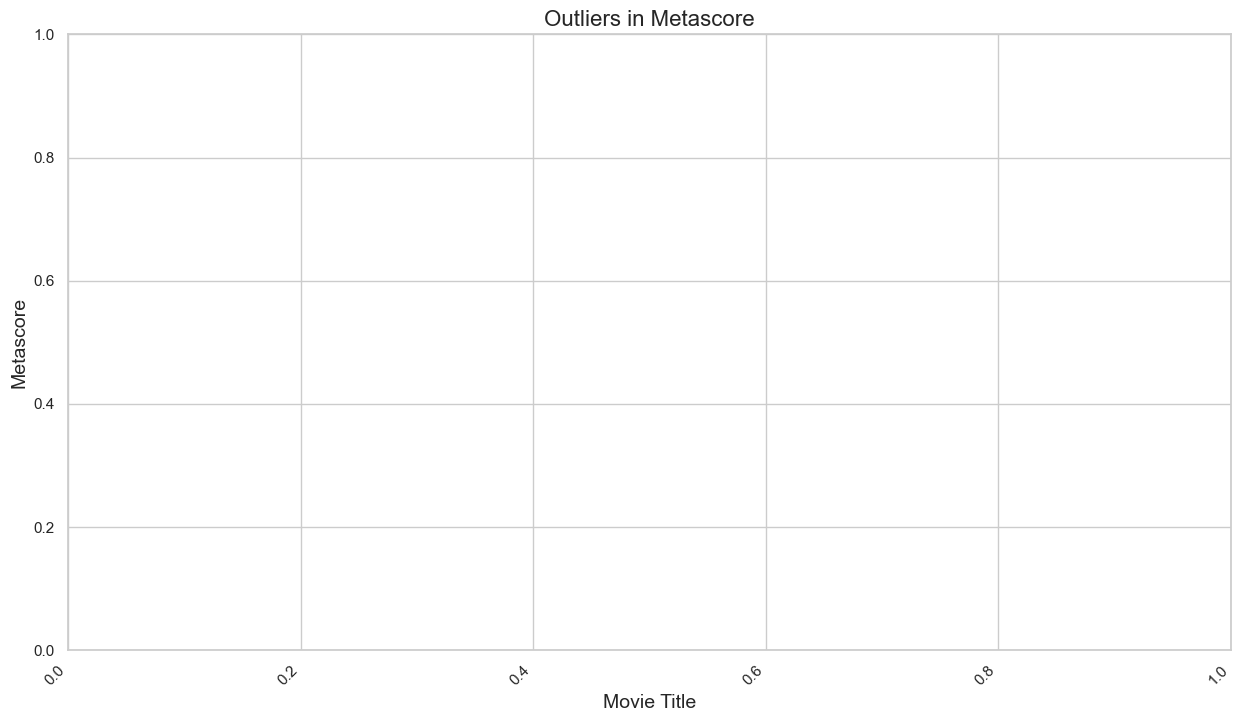

In [ ]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the boxplot for Metascore to identify outliers
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=movie_cleared["Metascore"], palette="mako")

# Adding title and labels
box_plot.set_title("Boxplot of Metascore to Identify Outliers", fontsize=16)
box_plot.set_xlabel("Metascore", fontsize=14)

# Display the plot
plt.show()

# Identifying outliers
Q1 = movie_cleared["Metascore"].quantile(0.25)
Q3 = movie_cleared["Metascore"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = movie_cleared[(movie_cleared["Metascore"] < lower_bound) | (movie_cleared["Metascore"] > upper_bound)]
print("Outliers in Metascore:")
print(outliers[["Title", "Director", "Metascore"]])

if not outliers.empty:
    # Visualizing the outliers
    plt.figure(figsize=(15, 8))
    outliers_plot = sns.scatterplot(
        x=outliers["Title"],
        y=outliers["Metascore"],
        hue=outliers["Director"],
        palette="mako",
        s=100
    )

    # Adding title and labels
    outliers_plot.set_title("Outliers in Metascore", fontsize=16)
    outliers_plot.set_xlabel("Movie Title", fontsize=14)
    outliers_plot.set_ylabel("Metascore", fontsize=14)

    # Rotating x-axis labels for better readability
    outliers_plot.set_xticklabels(outliers_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Display the plot
    plt.show()
else:
    print("No outliers found in the Metascore column.")

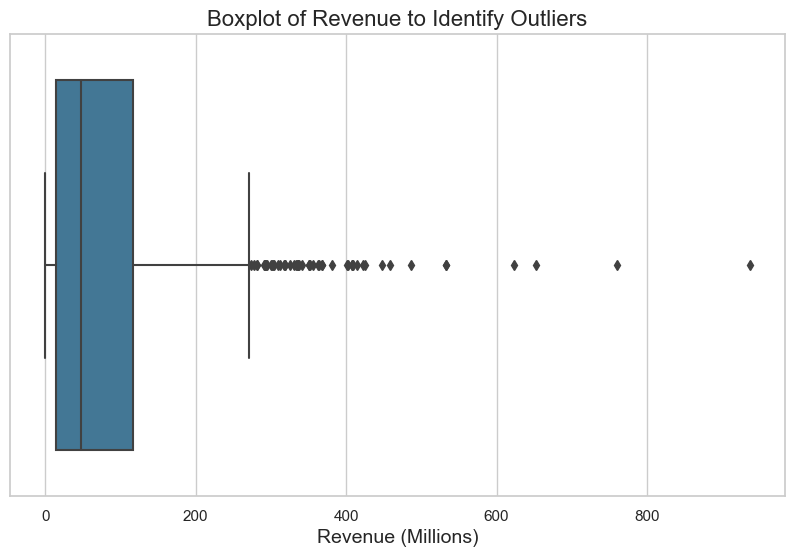

Outliers in Revenue:
                                                 Title           Director  \
0                              Guardians of the Galaxy         James Gunn   
4                                        Suicide Squad         David Ayer   
12                                           Rogue One     Gareth Edwards   
15                             The Secret Life of Pets       Chris Renaud   
33                                            Deadpool         Tim Miller   
35                          Captain America: Civil War      Anthony Russo   
50          Star Wars: Episode VII - The Force Awakens        J.J. Abrams   
54                                     The Dark Knight  Christopher Nolan   
60                  Batman v Superman: Dawn of Justice        Zack Snyder   
74                                            Zootopia       Byron Howard   
75            Pirates of the Caribbean: At World's End     Gore Verbinski   
76                                        The Avengers 

C:\Users\e10134199\AppData\Local\Temp\ipykernel_23788\1103829103.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  outliers_plot_revenue.set_xticklabels(outliers_plot_revenue.get_xticklabels(), rotation=45, horizontalalignment='right')


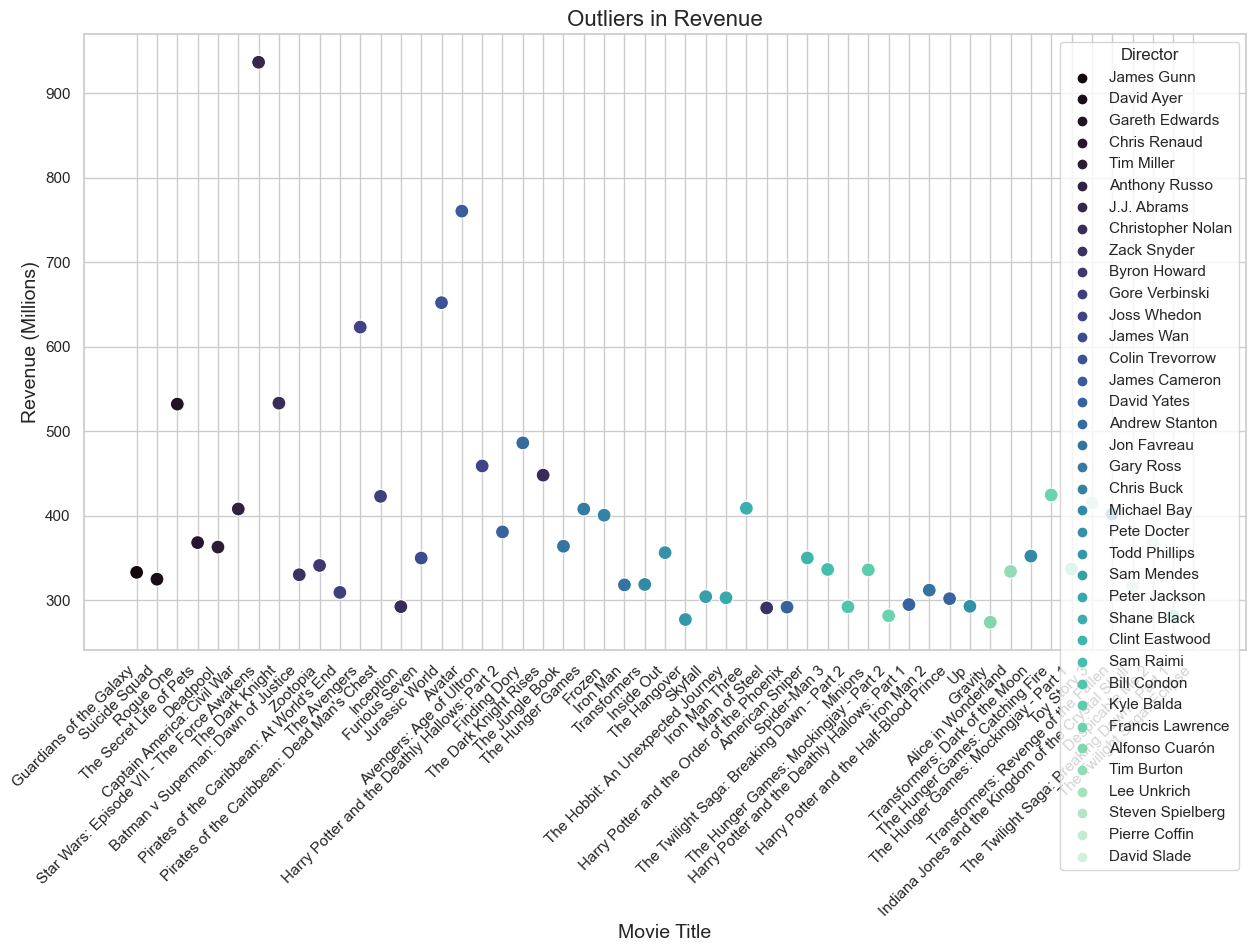

In [71]:
# Plotting the boxplot for Revenue to identify outliers
plt.figure(figsize=(10, 6))
box_plot_revenue = sns.boxplot(x=movie_cleared["Revenue (Millions)"], palette="mako")

# Adding title and labels
box_plot_revenue.set_title("Boxplot of Revenue to Identify Outliers", fontsize=16)
box_plot_revenue.set_xlabel("Revenue (Millions)", fontsize=14)

# Display the plot
plt.show()

# Identifying outliers
Q1_revenue = movie_cleared["Revenue (Millions)"].quantile(0.25)
Q3_revenue = movie_cleared["Revenue (Millions)"].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

outliers_revenue = movie_cleared[(movie_cleared["Revenue (Millions)"] < lower_bound_revenue) | (movie_cleared["Revenue (Millions)"] > upper_bound_revenue)]
print("Outliers in Revenue:")
print(outliers_revenue[["Title", "Director", "Revenue (Millions)"]])

if not outliers_revenue.empty:
    # Visualizing the outliers
    plt.figure(figsize=(15, 8))
    outliers_plot_revenue = sns.scatterplot(
        x=outliers_revenue["Title"],
        y=outliers_revenue["Revenue (Millions)"],
        hue=outliers_revenue["Director"],
        palette="mako",
        s=100
    )

    # Adding title and labels
    outliers_plot_revenue.set_title("Outliers in Revenue", fontsize=16)
    outliers_plot_revenue.set_xlabel("Movie Title", fontsize=14)
    outliers_plot_revenue.set_ylabel("Revenue (Millions)", fontsize=14)

    # Rotating x-axis labels for better readability
    outliers_plot_revenue.set_xticklabels(outliers_plot_revenue.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Display the plot
    plt.show()
else:
    print("No outliers found in the Revenue column.")